In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Create your connection.
cnx = sqlite3.connect('F:\Acad\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [21]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
pd.options.display.max_columns = None

In [7]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,53.001408,49.392783,57.084578,63.453846,67.709405,68.101628,65.995082,66.148297,65.190082,61.866474,66.977333,67.053401,67.432477,53.387560,60.946217,51.897374,55.730730,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,18.245476,17.820262,14.412035,15.187692,13.011580,12.585984,12.963670,9.145011,13.076192,16.129537,11.017828,13.200669,12.085131,18.370204,16.101618,19.483338,18.458218,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [22]:
pf=df.corr().sort_values('overall_rating', ascending=False)
pf

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,0.354191,0.357566,0.349800,0.434525,0.443991,0.243998,0.253048,0.239963,0.771856,0.160211,0.428053,0.258978,0.325606,0.315684,0.392668,0.322782,0.249094,0.368978,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
reactions,-0.005740,-0.233465,-0.312538,0.771856,0.580991,0.384999,0.354769,0.295601,0.460469,0.397448,0.377852,0.392756,0.369191,0.402346,0.448534,0.272381,0.271149,0.297030,1.000000,0.205899,0.423433,0.239991,0.355189,0.234597,0.414293,0.330310,0.244665,0.409155,0.452559,0.390045,0.123173,0.159255,0.137098,-0.073940,-0.079753,-0.033067,-0.078091,-0.078300
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,0.296050,0.262842,0.343133,0.401803,0.338820,0.340698,0.293714,0.580991,0.202232,0.325459,0.174532,0.259432,0.122392,0.313059,0.162137,0.163292,0.326898,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,0.731948,0.693490,0.803073,0.890622,0.502893,0.490562,0.510650,0.460469,0.462617,0.722320,0.060067,0.611422,0.089782,0.729741,0.455426,0.425764,0.679014,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
ball_control,-0.013976,-0.024942,-0.053940,0.443991,0.401803,0.807721,0.720694,0.550956,0.890622,0.749459,0.901730,0.798598,0.720674,0.675525,1.000000,0.632294,0.617240,0.624759,0.448534,0.522203,0.774856,0.065310,0.605985,0.027030,0.793219,0.368064,0.275817,0.780410,0.773185,0.684410,0.188479,0.252325,0.220588,-0.741678,-0.732701,-0.465803,-0.735166,-0.738085
long_passing,-0.008137,-0.111272,-0.139584,0.434525,0.343133,0.685649,0.341121,0.362741,0.803073,0.414520,0.579201,0.586313,0.603286,1.000000,0.675525,0.325659,0.303109,0.380271,0.402346,0.379112,0.542244,0.045272,0.529958,0.065553,0.576376,0.458114,0.537764,0.482456,0.670151,0.476750,0.441837,0.496679,0.462544,-0.464221,-0.466906,-0.261361,-0.468453,-0.469598
vision,-0.007928,-0.163099,-0.188087,0.431493,0.379278,0.693978,0.652376,0.336472,0.766401,0.690716,0.734119,0.728198,0.697943,0.670151,0.773185,0.470370,0.435667,0.559152,0.452559,0.507510,0.647262,0.017372,0.506252,-0.039883,0.730112,0.276333,0.233281,0.740857,1.000000,0.665802,0.080042,0.144749,0.118656,-0.502582,-0.461778,-0.201738,-0.465109,-0.470499
shot_power,-0.010371,-0.080175,-0.126514,0.428053,0.325459,0.656740,0.727835,0.541365,0.722320,0.746622,0.744960,0.694945,0.684191,0.542244,0.774856,0.476207,0.486240,0.461944,0.423433,0.360102,1.000000,0.099289,0.514612,0.175464,0.838254,0.366968,0.189623,0.706849,0.647262,0.680887,0.094068,0.155941,0.117569,-0.584551,-0.589048,-0.398712,-0.591626,-0.593827
penalties,-0.011751,-0.175255,-0.162481,0.392715,0.315207,0.574208,0.726234,0.431291,0.612511,0.713116,0.663420,0.649737,0.669018,0.476750,0.684410,0.428884,0.411872,0.442737,0.390045,0.391050,0.680887,0.058097,0.399233,0.056923,0.714596,0.218452,0.077169,0.753908,0.665802,1.000000,-0.043649,0.005405,-0.030404,-0.470286,-0.435311,-0.189194,-0.439610,-0.443635
long_shots,-0.010382,-0.068652,-0.119638,0.392668,0.313059,0.716515,0.806895,0.406003,0.729741,0.814894,0.807175,0.783732,0.773887,0.576376,0.793219,0.513988,0.489863,0.554667,0.414293,0.440738,0.838254,0.012859,0.476620,-0.000067,1.000000,0.236427,0.107723,0.772065,0.730112,0.714596,-0.011926,0.054655,0.022683,-0.545446

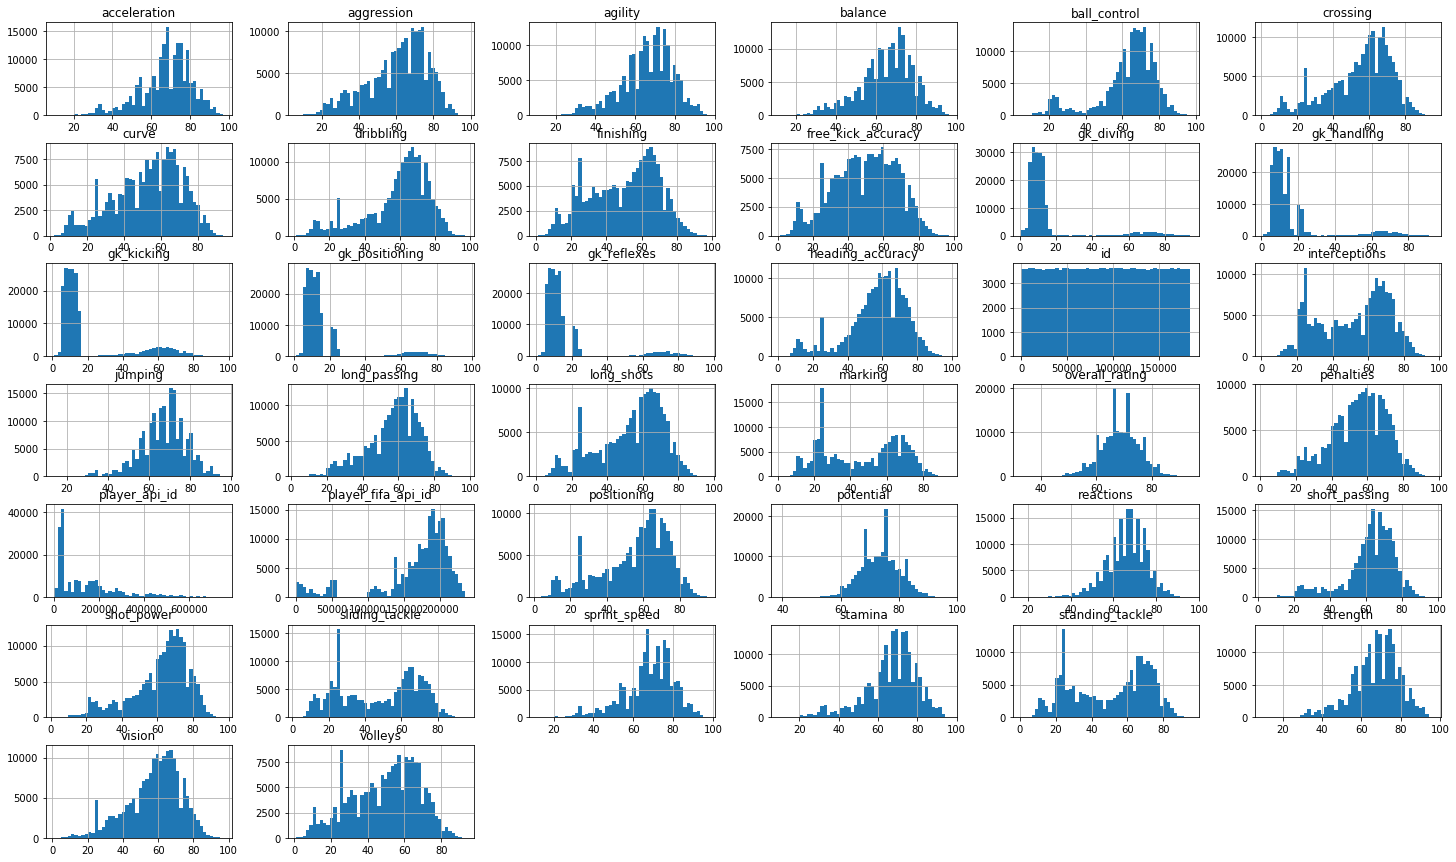

In [9]:
df.hist(bins=50, figsize=(25, 15))
plt.show()

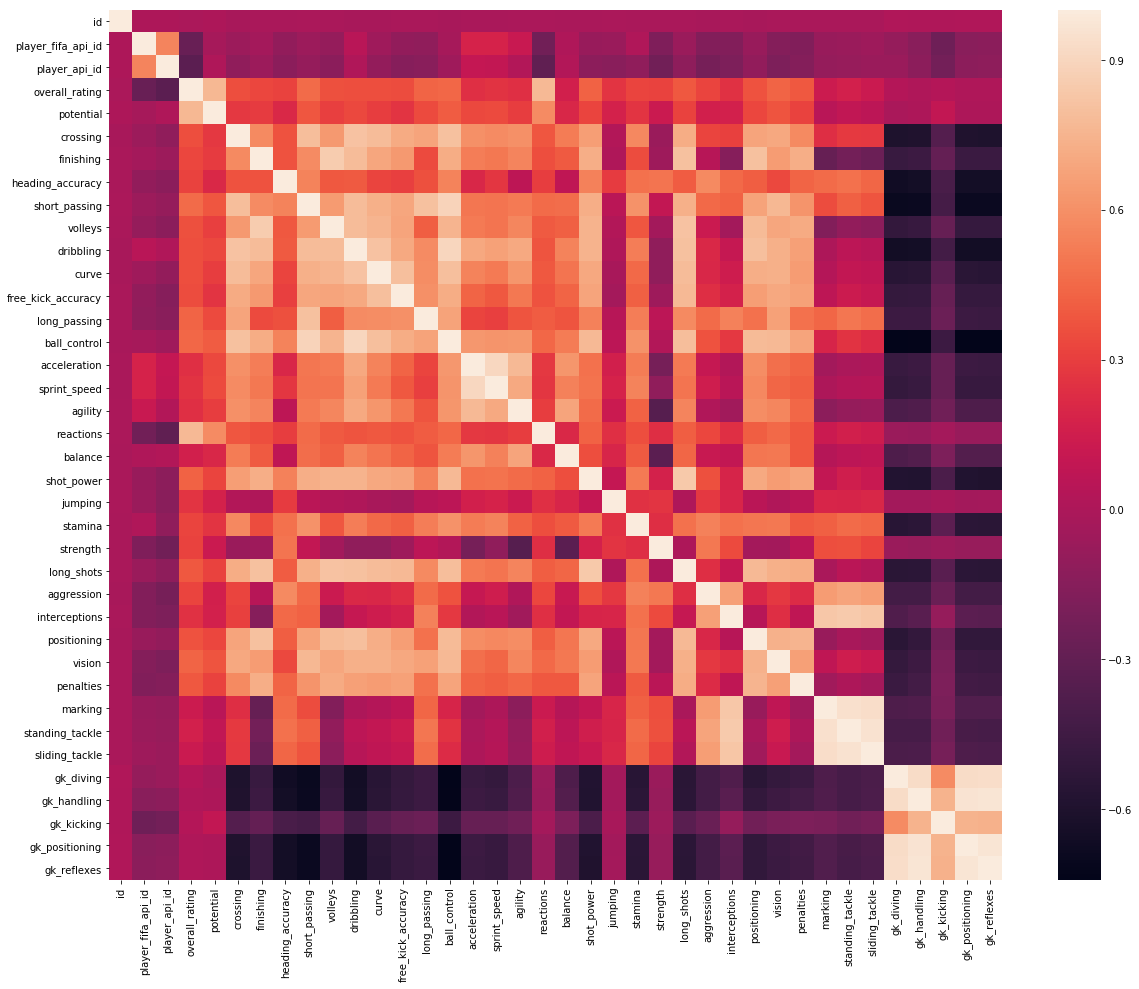

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr())

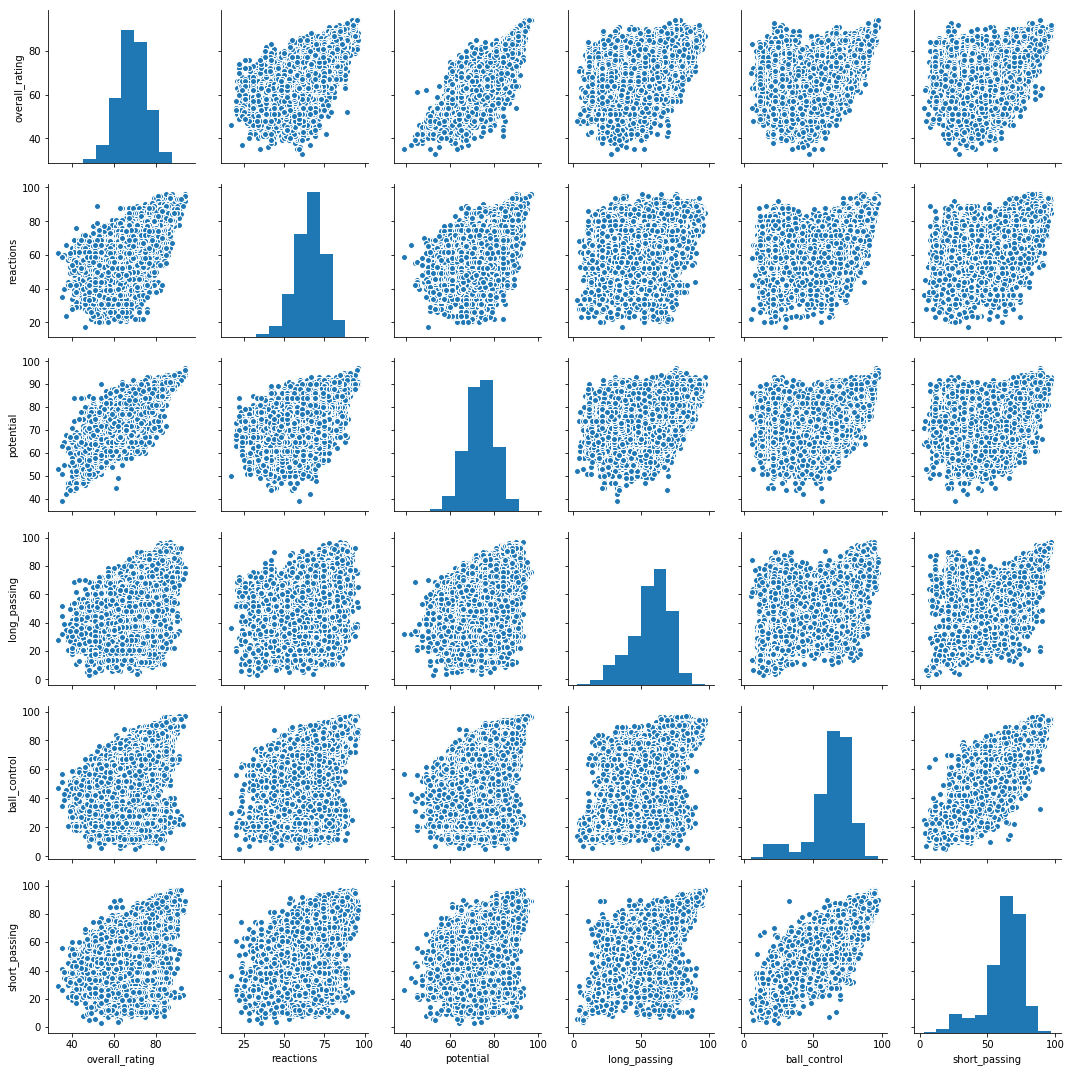

In [23]:
sns.pairplot(df[['overall_rating', 'reactions', 'potential', 'long_passing', 'ball_control', 'short_passing']].iloc[:,:])